In [1]:
import pandas as pd
import numpy as np
import re
import json
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv('results.csv')[['Round', 'Home', 'Away', 'Score']].set_index(['Home', 'Away'])
fivethirtyeight = pd.read_csv('538.csv').rename(columns={
    'proba': '538_proba',
    'probx': '538_probx',
    'probb': '538_probb',
})
fivethirtyeight['teama'] = fivethirtyeight['teama'].apply(lambda x: x if x != 'USA' else 'United States')
fivethirtyeight['teamb'] = fivethirtyeight['teamb'].apply(lambda x: x if x != 'USA' else 'United States')
fivethirtyeight['teama'] = fivethirtyeight['teama'].apply(lambda x: x if x != 'South Korea' else 'Korea Republic')
fivethirtyeight['teamb'] = fivethirtyeight['teamb'].apply(lambda x: x if x != 'South Korea' else 'Korea Republic')
fivethirtyeight = fivethirtyeight.rename(columns={'teama': 'Home', 'teamb': 'Away'}).set_index(['Home', 'Away'])
m301060 = pd.read_csv('301060.csv')
m301060.columns = ['proba', 'Home', 'probx', 'Away', 'probb']
m301060['proba'] /= 100
m301060['probx'] /= 100
m301060['probb'] /= 100
m301060 = m301060.rename(columns={
    'proba': '301060_proba',
    'probx': '301060_probx',
    'probb': '301060_probb',
}).set_index(['Home', 'Away'])
names = {
    'Qatar': 'qat',
    'Ecuador': 'ecu',
    'England': 'eng',
    'Senegal': 'sen',
    'United States': 'usa',
    'Argentina': 'arg',
    'Denmark': 'den',
    'Mexico': 'mex',
    'France': 'fra',
    'Morocco': 'mor',
    'Germany': 'ger',
    'Spain': 'spa',
    'Belgium': 'bel',
    'Switzerland': 'swi',
    'Uruguay': 'uru',
    'Portugal': 'por',
    'Brazil': 'bra',
    'Wales': 'wal',
    'Netherlands': 'ned',
    'Tunisia': 'tun',
    'Poland': 'pol',
    'Japan': 'jap',
    'Croatia': 'cro',
    'Cameroon': 'cam',
    'Korea Republic': 'kor',
    'Ecuador': 'ecu',
    'Iran': 'ira',
    'Australia': 'aus',
    'Saudi Arabia': 'sau',
    'Canada': 'can',
    'Costa Rica': 'cos',
    'Ghana': 'gha',
    'Serbia': 'ser',
}

def read_oddspedia(f):
    with open(f'oddspedia/{f}.json', 'r') as fp:
        data = json.loads(fp.read())['data']['prematch'][0]['periods'][0]['odds']
    series = {}
    for row in data:
        if row['bookie_slug'] != 'bet365': continue
        p1, p2, p3 = 1/float(row['o1']), 1/float(row['o2']), 1/float(row['o3'])
        series[f'{row["bookie_slug"]}_proba'] = p1/(p1+p2+p3)
        series[f'{row["bookie_slug"]}_probx'] = p2/(p1+p2+p3)
        series[f'{row["bookie_slug"]}_probb'] = p3/(p1+p2+p3)
        series[f'{row["bookie_slug"]}_paya'] = float(row['o1'])
        series[f'{row["bookie_slug"]}_payx'] = float(row['o2'])
        series[f'{row["bookie_slug"]}_payb'] = float(row['o3'])
    return pd.Series(series)

oddspedia = results.apply(lambda row: read_oddspedia(f'{names[row.name[0]]}-{names[row.name[1]]}'), axis=1)
df = results.join(fivethirtyeight).join(m301060).join(oddspedia.dropna(axis=1))
df = df.drop(['Croatia', 'Morocco'])
df = df.drop(['Argentina', 'France'])
df

/usr/local/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,,Round,Score,538_proba,538_probx,538_probb,301060_proba,301060_probx,301060_probb,bet365_proba,bet365_probx,bet365_probb,bet365_paya,bet365_payx,bet365_payb
Home,Away,,,,,,,,,,,,,,
Qatar,Ecuador,Group stage,0–2,0.24,0.26,0.50,0.13,0.21,0.66,0.263158,0.315789,0.421053,3.600,3.00,2.25
England,Iran,Group stage,6–2,0.63,0.25,0.12,0.68,0.20,0.12,0.695688,0.199186,0.105126,1.360,4.75,9.00
Senegal,Netherlands,Group stage,0–2,0.22,0.27,0.51,0.15,0.21,0.64,0.171203,0.261560,0.567238,5.500,3.60,1.66
United States,Wales,Group stage,1–1,0.45,0.29,0.26,0.47,0.29,0.23,0.391244,0.309209,0.299546,2.450,3.10,3.20
Denmark,Tunisia,Group stage,0–0,0.50,0.29,0.21,0.54,0.26,0.20,0.604534,0.237280,0.158186,1.570,4.00,6.00
Mexico,Poland,Group stage,0–0,0.42,0.30,0.28,0.38,0.26,0.36,0.391244,0.309209,0.299546,2.450,3.10,3.20
Germany,Japan,Group stage,1–2,0.60,0.23,0.17,0.46,0.29,0.25,0.662747,0.200917,0.136336,1.440,4.75,7.00
Spain,Costa Rica,Group stage,7–0,0.76,0.18,0.06,0.85,0.10,0.04,0.837714,0.106110,0.056176,1.140,9.00,17.00
Belgium,Canada,Group stage,1–0,0.49,0.26,0.25,0.74,0.17,0.09,0.595855,0.238342,0.165803,1.600,4.00,5.75


In [3]:
def winner(score):
    if isinstance(score, float) and np.isnan(score):
        return None
    scores = score.split(' ')
    if len(scores) == 1:
        a, b = int(score.split('–')[0]), int(score.split('–')[1])
        if a == b:
            return 'x'
        if a > b:
            return 'a'
        return 'b'
    segs = re.split(r'(\d+)', score)
    if int(segs[1]) < int(segs[7]):
        return 'b'
    return 'a'
df['winner'] = df['Score'].apply(winner)
df

,,Round,Score,538_proba,538_probx,538_probb,301060_proba,301060_probx,301060_probb,bet365_proba,bet365_probx,bet365_probb,bet365_paya,bet365_payx,bet365_payb,winner
Home,Away,,,,,,,,,,,,,,,
Qatar,Ecuador,Group stage,0–2,0.24,0.26,0.50,0.13,0.21,0.66,0.263158,0.315789,0.421053,3.600,3.00,2.25,b
England,Iran,Group stage,6–2,0.63,0.25,0.12,0.68,0.20,0.12,0.695688,0.199186,0.105126,1.360,4.75,9.00,a
Senegal,Netherlands,Group stage,0–2,0.22,0.27,0.51,0.15,0.21,0.64,0.171203,0.261560,0.567238,5.500,3.60,1.66,b
United States,Wales,Group stage,1–1,0.45,0.29,0.26,0.47,0.29,0.23,0.391244,0.309209,0.299546,2.450,3.10,3.20,x
Denmark,Tunisia,Group stage,0–0,0.50,0.29,0.21,0.54,0.26,0.20,0.604534,0.237280,0.158186,1.570,4.00,6.00,x
Mexico,Poland,Group stage,0–0,0.42,0.30,0.28,0.38,0.26,0.36,0.391244,0.309209,0.299546,2.450,3.10,3.20,x
Germany,Japan,Group stage,1–2,0.60,0.23,0.17,0.46,0.29,0.25,0.662747,0.200917,0.136336,1.440,4.75,7.00,b
Spain,Costa Rica,Group stage,7–0,0.76,0.18,0.06,0.85,0.10,0.04,0.837714,0.106110,0.056176,1.140,9.00,17.00,a
Belgium,Canada,Group stage,1–0,0.49,0.26,0.25,0.74,0.17,0.09,0.595855,0.238342,0.165803,1.600,4.00,5.75,a


In [4]:
def payout_row_301060(row):
    payout = 0.0
    payout -= int(row['301060_proba'] > row['bet365_proba'])
    payout -= int(row['301060_probb'] > row['bet365_probb'])
    payout -= int(row['301060_probx'] > row['bet365_probx'])
    if row['301060_proba'] > row['bet365_proba'] and row['winner'] == 'a':
        payout += row['bet365_paya']
    if row['301060_probb'] > row['bet365_probb'] and row['winner'] == 'b':
        payout += row['bet365_payb']
    if row['301060_probx'] > row['bet365_probx'] and row['winner'] == 'x':
        payout += row['bet365_payx']
    return payout
df['301060_payout'] = df.apply(payout_row_301060, axis=1)
df

,,Round,Score,538_proba,538_probx,538_probb,301060_proba,301060_probx,301060_probb,bet365_proba,bet365_probx,bet365_probb,bet365_paya,bet365_payx,bet365_payb,winner,301060_payout
Home,Away,,,,,,,,,,,,,,,,
Qatar,Ecuador,Group stage,0–2,0.24,0.26,0.50,0.13,0.21,0.66,0.263158,0.315789,0.421053,3.600,3.00,2.25,b,1.250
England,Iran,Group stage,6–2,0.63,0.25,0.12,0.68,0.20,0.12,0.695688,0.199186,0.105126,1.360,4.75,9.00,a,-2.000
Senegal,Netherlands,Group stage,0–2,0.22,0.27,0.51,0.15,0.21,0.64,0.171203,0.261560,0.567238,5.500,3.60,1.66,b,0.660
United States,Wales,Group stage,1–1,0.45,0.29,0.26,0.47,0.29,0.23,0.391244,0.309209,0.299546,2.450,3.10,3.20,x,-1.000
Denmark,Tunisia,Group stage,0–0,0.50,0.29,0.21,0.54,0.26,0.20,0.604534,0.237280,0.158186,1.570,4.00,6.00,x,2.000
Mexico,Poland,Group stage,0–0,0.42,0.30,0.28,0.38,0.26,0.36,0.391244,0.309209,0.299546,2.450,3.10,3.20,x,-1.000
Germany,Japan,Group stage,1–2,0.60,0.23,0.17,0.46,0.29,0.25,0.662747,0.200917,0.136336,1.440,4.75,7.00,b,5.000
Spain,Costa Rica,Group stage,7–0,0.76,0.18,0.06,0.85,0.10,0.04,0.837714,0.106110,0.056176,1.140,9.00,17.00,a,0.140
Belgium,Canada,Group stage,1–0,0.49,0.26,0.25,0.74,0.17,0.09,0.595855,0.238342,0.165803,1.600,4.00,5.75,a,0.600


In [5]:
df['301060_payout'].sum()

21.009

In [6]:
df.sort_values(by='301060_payout')

,,Round,Score,538_proba,538_probx,538_probb,301060_proba,301060_probx,301060_probb,bet365_proba,bet365_probx,bet365_probb,bet365_paya,bet365_payx,bet365_payb,winner,301060_payout
Home,Away,,,,,,,,,,,,,,,,
England,Iran,Group stage,6–2,0.63,0.25,0.12,0.68,0.20,0.12,0.695688,0.199186,0.105126,1.360,4.75,9.00,a,-2.000
Saudi Arabia,Mexico,Group stage,1–2,0.23,0.31,0.46,0.19,0.28,0.53,0.172037,0.225286,0.602677,5.500,4.20,1.57,b,-2.000
Poland,Saudi Arabia,Group stage,2–0,0.41,0.30,0.29,0.52,0.27,0.20,0.556783,0.262925,0.180292,1.700,3.60,5.25,a,-2.000
Costa Rica,Germany,Group stage,2–4,0.05,0.15,0.80,0.11,0.17,0.72,0.036446,0.086146,0.877408,26.000,11.00,1.08,b,-2.000
Iran,United States,Group stage,0–1,0.31,0.31,0.38,0.34,0.28,0.38,0.224930,0.277855,0.497214,4.200,3.40,1.90,b,-2.000
Uruguay,Korea Republic,Group stage,0–0,0.53,0.28,0.19,0.58,0.23,0.19,0.536278,0.276025,0.187697,1.750,3.40,5.00,x,-2.000
Korea Republic,Ghana,Group stage,2–3,0.44,0.33,0.23,0.48,0.23,0.29,0.346369,0.307263,0.346369,2.750,3.10,2.75,b,-1.000
England,United States,Group stage,0–0,0.54,0.26,0.20,0.64,0.22,0.14,0.655098,0.226165,0.118737,1.450,4.20,8.00,x,-1.000
Netherlands,Ecuador,Group stage,1–1,0.49,0.29,0.22,0.61,0.22,0.17,0.512800,0.287479,0.199722,1.850,3.30,4.75,x,-1.000


In [7]:
def remove_tie(row):
    if row['Round'] != 'Group stage':
        for key, value in row.items():
            if key.endswith('_probx') and value > 0:
                row[key] = 0.0
                row[key[:-1] + 'a'] += value / 2
                row[key[:-1] + 'b'] += value / 2
    return pd.Series(row)
df = df.apply(remove_tie, axis=1)
df

,,Round,Score,538_proba,538_probx,538_probb,301060_proba,301060_probx,301060_probb,bet365_proba,bet365_probx,bet365_probb,bet365_paya,bet365_payx,bet365_payb,winner,301060_payout
Home,Away,,,,,,,,,,,,,,,,
Qatar,Ecuador,Group stage,0–2,0.24,0.26,0.50,0.13,0.21,0.66,0.263158,0.315789,0.421053,3.600,3.00,2.25,b,1.250
England,Iran,Group stage,6–2,0.63,0.25,0.12,0.68,0.20,0.12,0.695688,0.199186,0.105126,1.360,4.75,9.00,a,-2.000
Senegal,Netherlands,Group stage,0–2,0.22,0.27,0.51,0.15,0.21,0.64,0.171203,0.261560,0.567238,5.500,3.60,1.66,b,0.660
United States,Wales,Group stage,1–1,0.45,0.29,0.26,0.47,0.29,0.23,0.391244,0.309209,0.299546,2.450,3.10,3.20,x,-1.000
Denmark,Tunisia,Group stage,0–0,0.50,0.29,0.21,0.54,0.26,0.20,0.604534,0.237280,0.158186,1.570,4.00,6.00,x,2.000
Mexico,Poland,Group stage,0–0,0.42,0.30,0.28,0.38,0.26,0.36,0.391244,0.309209,0.299546,2.450,3.10,3.20,x,-1.000
Germany,Japan,Group stage,1–2,0.60,0.23,0.17,0.46,0.29,0.25,0.662747,0.200917,0.136336,1.440,4.75,7.00,b,5.000
Spain,Costa Rica,Group stage,7–0,0.76,0.18,0.06,0.85,0.10,0.04,0.837714,0.106110,0.056176,1.140,9.00,17.00,a,0.140
Belgium,Canada,Group stage,1–0,0.49,0.26,0.25,0.74,0.17,0.09,0.595855,0.238342,0.165803,1.600,4.00,5.75,a,0.600


In [8]:
def payout_row_538(row):
    payout = 0.0
    payout -= int(row['538_proba'] > row['bet365_proba'])
    payout -= int(row['538_probb'] > row['bet365_probb'])
    payout -= int(row['538_probx'] > row['bet365_probx'])
    if row['538_proba'] > row['bet365_proba'] and row['winner'] == 'a':
        payout += row['bet365_paya']
    if row['538_probb'] > row['bet365_probb'] and row['winner'] == 'b':
        payout += row['bet365_payb']
    if row['538_probx'] > row['bet365_probx'] and row['winner'] == 'x':
        payout += row['bet365_payx']
    return payout
df['538_payout'] = df.apply(payout_row_538, axis=1)
df

,,Round,Score,538_proba,538_probx,538_probb,301060_proba,301060_probx,301060_probb,bet365_proba,bet365_probx,bet365_probb,bet365_paya,bet365_payx,bet365_payb,winner,301060_payout,538_payout
Home,Away,,,,,,,,,,,,,,,,,
Qatar,Ecuador,Group stage,0–2,0.24,0.26,0.50,0.13,0.21,0.66,0.263158,0.315789,0.421053,3.600,3.00,2.25,b,1.250,1.25
England,Iran,Group stage,6–2,0.63,0.25,0.12,0.68,0.20,0.12,0.695688,0.199186,0.105126,1.360,4.75,9.00,a,-2.000,-2.00
Senegal,Netherlands,Group stage,0–2,0.22,0.27,0.51,0.15,0.21,0.64,0.171203,0.261560,0.567238,5.500,3.60,1.66,b,0.660,-2.00
United States,Wales,Group stage,1–1,0.45,0.29,0.26,0.47,0.29,0.23,0.391244,0.309209,0.299546,2.450,3.10,3.20,x,-1.000,-1.00
Denmark,Tunisia,Group stage,0–0,0.50,0.29,0.21,0.54,0.26,0.20,0.604534,0.237280,0.158186,1.570,4.00,6.00,x,2.000,2.00
Mexico,Poland,Group stage,0–0,0.42,0.30,0.28,0.38,0.26,0.36,0.391244,0.309209,0.299546,2.450,3.10,3.20,x,-1.000,-1.00
Germany,Japan,Group stage,1–2,0.60,0.23,0.17,0.46,0.29,0.25,0.662747,0.200917,0.136336,1.440,4.75,7.00,b,5.000,5.00
Spain,Costa Rica,Group stage,7–0,0.76,0.18,0.06,0.85,0.10,0.04,0.837714,0.106110,0.056176,1.140,9.00,17.00,a,0.140,-2.00
Belgium,Canada,Group stage,1–0,0.49,0.26,0.25,0.74,0.17,0.09,0.595855,0.238342,0.165803,1.600,4.00,5.75,a,0.600,-2.00


In [9]:
df['538_payout'].sum()

-5.059999999999999

In [10]:
df.sort_values(by='538_payout')

,,Round,Score,538_proba,538_probx,538_probb,301060_proba,301060_probx,301060_probb,bet365_proba,bet365_probx,bet365_probb,bet365_paya,bet365_payx,bet365_payb,winner,301060_payout,538_payout
Home,Away,,,,,,,,,,,,,,,,,
Korea Republic,Ghana,Group stage,2–3,0.44,0.33,0.23,0.48,0.23,0.29,0.346369,0.307263,0.346369,2.750,3.10,2.75,b,-1.000,-2.00
Qatar,Senegal,Group stage,1–3,0.21,0.27,0.52,0.15,0.23,0.61,0.180292,0.262925,0.556783,5.250,3.60,1.70,b,0.700,-2.00
Canada,Morocco,Group stage,1–2,0.29,0.31,0.40,0.11,0.24,0.66,0.200293,0.279821,0.519886,4.750,3.40,1.83,b,0.830,-2.00
Costa Rica,Germany,Group stage,2–4,0.05,0.15,0.80,0.11,0.17,0.72,0.036446,0.086146,0.877408,26.000,11.00,1.08,b,-2.000,-2.00
Portugal,Uruguay,Group stage,2–0,0.44,0.30,0.26,0.48,0.26,0.26,0.500506,0.288170,0.211325,1.900,3.30,4.50,a,-1.000,-2.00
Switzerland,Cameroon,Group stage,1–0,0.50,0.28,0.22,0.62,0.22,0.16,0.536278,0.276025,0.187697,1.750,3.40,5.00,a,0.750,-2.00
Poland,Argentina,Group stage,0–2,0.15,0.27,0.58,0.12,0.18,0.70,0.111603,0.210806,0.677591,8.500,4.50,1.40,b,-0.600,-2.00
Belgium,Canada,Group stage,1–0,0.49,0.26,0.25,0.74,0.17,0.09,0.595855,0.238342,0.165803,1.600,4.00,5.75,a,0.600,-2.00
Poland,Saudi Arabia,Group stage,2–0,0.41,0.30,0.29,0.52,0.27,0.20,0.556783,0.262925,0.180292,1.700,3.60,5.25,a,-2.000,-2.00


In [11]:
payouts = df[['301060_payout', '538_payout']].reset_index()
payouts['match'] = payouts.apply(lambda row: f'{row["Home"]}-{row["Away"]}', axis=1)
payouts = payouts.drop(['Home', 'Away'], axis=1)
payouts

,301060_payout,538_payout,match
0,1.250,1.25,Qatar-Ecuador
1,-2.000,-2.00,England-Iran
2,0.660,-2.00,Senegal-Netherlands
3,-1.000,-1.00,United States-Wales
4,2.000,2.00,Denmark-Tunisia
5,-1.000,-1.00,Mexico-Poland
6,5.000,5.00,Germany-Japan
7,0.140,-2.00,Spain-Costa Rica
8,0.600,-2.00,Belgium-Canada
9,0.750,-2.00,Switzerland-Cameroon


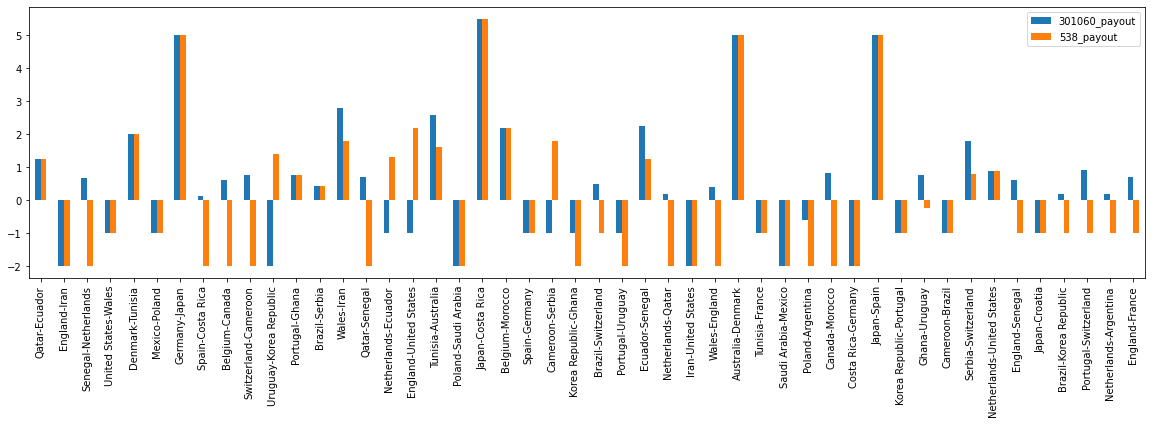

In [18]:
fig, ax = plt.subplots(figsize=(20, 5))
payouts.plot.bar(ax=ax)
fig.patch.set_facecolor('white')
ax.set_xticklabels(payouts['match']);